### Regression Models Analysis & Prediction on Test Data

In this notebook, we will take the cleaned train data exported from the house_price.ipynb notebook and analyse the regression models on the data. We will also compare the accuracy of different regression methods with cross_val_score and mean squared error.

In [37]:
# standard python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn methods
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [2]:
# Importing the dataframe exported after analysis and refinement from other Notebook

df = pd.read_csv("df_model.csv")
df.head()

,Unnamed: 0,TotalBsmtSF,BsmtFinSF2,FullBath,SalePrice,KitchenAbvGr,MiscVal,EnclosedPorch,LotArea,1stFlrSF,...,Heating-Floor,Heating-GasA,Heating-GasW,Heating-Grav,Heating-OthW,Heating-Wall,ExterQual-Ex,ExterQual-Fa,ExterQual-Gd,ExterQual-TA
0,0,856,0,2,5.319,1,0,0,8450,856,...,0,1,0,0,0,0,0,0,1,0
1,1,1262,0,2,5.259,1,0,0,9600,1262,...,0,1,0,0,0,0,0,0,0,1
2,2,920,0,2,5.349,1,0,0,11250,920,...,0,1,0,0,0,0,0,0,1,0
3,3,756,0,1,5.146,1,0,272,9550,961,...,0,1,0,0,0,0,0,0,0,1
4,4,1145,0,2,5.398,1,0,0,14260,1145,...,0,1,0,0,0,0,0,0,1,0


In [3]:
# One extra unncessary column appeared here, let us drop that. (TODO: can fix that, while exporting data or importing here!)
df.drop('Unnamed: 0', axis=1, inplace=True)
print('extra column that came across is dropped')

extra column that came across is dropped


In [4]:
df.columns

Index(['TotalBsmtSF', 'BsmtFinSF2', 'FullBath', 'SalePrice', 'KitchenAbvGr',
       'MiscVal', 'EnclosedPorch', 'LotArea', '1stFlrSF', 'YearBuilt',
       'LowQualFinSF', 'MSSubClass', '3SsnPorch', 'LotFrontage', 'PoolArea',
       'MoSold', 'Fireplaces', 'MasVnrArea', 'YearRemodAdd', 'OverallQual',
       'OpenPorchSF', 'YrSold', 'BedroomAbvGr', 'OverallCond', 'BsmtHalfBath',
       'BsmtFullBath', 'WoodDeckSF', 'GarageCars', 'GrLivArea', '2ndFlrSF',
       'KitchenQual-Ex', 'KitchenQual-Fa', 'KitchenQual-Gd', 'KitchenQual-TA',
       'BsmtQual-Ex', 'BsmtQual-Fa', 'BsmtQual-Gd', 'BsmtQual-TA',
       'Heating-Floor', 'Heating-GasA', 'Heating-GasW', 'Heating-Grav',
       'Heating-OthW', 'Heating-Wall', 'ExterQual-Ex', 'ExterQual-Fa',
       'ExterQual-Gd', 'ExterQual-TA'],
      dtype='object')

In [5]:
# Separating 'SalePrice' column

X_columns = df.columns.tolist()
X_columns.remove('SalePrice')

In [6]:
# The input data are:

X = df[X_columns]
y = df['SalePrice']

In [7]:
# The input data are:

x_train_len = round(X.shape[0]*0.75)
x_train = X[:x_train_len]
x_validation = X[x_train_len:]
y_train = y[:x_train_len]
y_validation = y[x_train_len:]

# print Test and Validation data lenght
print("Train data points: ", x_train_len)
print("Validation data points: ", x_validation.shape[0])

Train data points:  1092
Validation data points:  364


In [28]:
# A class that will define all the regression models as methods

class Models(object):
    
    global seed 
    seed = 34234
    
    # Initialization 
    def __init__(self, x_train, x_validation, y_train, y_validation):
        # changing input as dataframe to list
        self.x_train = [x_train.iloc[i].tolist() for i in range(len(x_train))]
        self.x_validation = [x_validation.iloc[i].tolist() for i in range(len(x_validation))]
        self.y_train = y_train.tolist()
        self.y_validation = y_validation.tolist()
    
    
    @staticmethod
    def print_info(cross_val_scores, mse):
        print("Cross Validation Scores: ", cross_val_scores)
        print("Mean Squared Error: ", mse)
        
        
    # Linear Regression 
    def linear_regression(self, x_train, x_validation,  y_train, y_validation):
        reg = linear_model.LinearRegression()
        # X = np.array(X).reshape([-1, 1])
        reg.fit(self.x_train, self.y_train)
        y_pred_list = reg.predict(self.x_validation)
        mse = mean_squared_error(self.y_validation, y_pred_list)
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(reg, self.x_train, self.y_train, cv=kfold)
        print("\nLinear Regression Model")
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse
        
    # Random Forest Regression model 
    def random_forest(self, x_train, x_validation,  y_train, y_validation):
        rfr = RandomForestRegressor(n_estimators=8, max_depth=8, random_state=12, verbose=0)
        # X = np.array(X).reshape([-1, 1])
        rfr.fit(self.x_train, self.y_train)
        y_pred_list = rfr.predict(self.x_validation)
        mse = mean_squared_error(self.y_validation, y_pred_list)
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(rfr, self.x_train, self.y_train, cv=kfold)
        print("\nRandom Forest Regressor")
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse
            
    # Lasso method 
    def lasso(self, x_train, x_validation,  y_train, y_validation):
        reg = linear_model.Lasso(alpha = 0.1)
        # X = np.array(X).reshape([-1, 1])
        reg.fit(self.x_train, self.y_train)
        y_pred_list = reg.predict(self.x_validation)
        mse = mean_squared_error(self.y_validation, y_pred_list)
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(reg, self.x_train, self.y_train, cv=kfold)
        print("\nLasso Regression Model")
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse
    
    # Gradient Boosing Regressor
    def GBR(self, x_train, x_validation,  y_train, y_validation):
        gbr = GradientBoostingRegressor(n_estimators=175, learning_rate=0.08, max_depth=3, random_state=1232, loss='ls')
        gbr.fit(self.x_train, self.y_train)
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(gbr, self.x_train, self.y_train, cv=kfold)
        mse = mean_squared_error(self.y_validation, gbr.predict(self.x_validation))
        print('\nGradient Boosting Regressor')
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse
        

In [36]:
# We use GridSearchCV to find out the best set of parameters for GBR and use it for the 
# regression model analysis and prediction
parameters = {
    'n_estimators' : [170, 175, 180],
    'learning_rate' : [0.075, 0.08, 0.1],
    'max_depth' : [2, 3, 4]
}

gbr = GradientBoostingRegressor(n_estimators=250, learning_rate=0.1, max_depth=5, random_state=232, loss='ls')
gs_cv = GridSearchCV(gbr, parameters).fit(x_train, y_train)
gs_cv.best_params_

{'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 175}

In [29]:
from types import FunctionType

methods = [x for x, y in Models.__dict__.items() if type(y) == FunctionType]
methods.remove('__init__')
# Now calling the all regression methods
cross_scores_list, mse_list = [], []
for model in methods:
    reg = Models(x_train, x_validation, y_train, y_validation)
    cross_val_scores, mse = getattr(reg, model)(x_train, x_validation, y_train, y_validation)
    cross_scores_list.append(cross_val_scores)
    mse_list.append(mse)


Linear Regression Model
Cross Validation Scores:  [ 0.87227481  0.67548551  0.90449058  0.94104202  0.88030722  0.86738322
  0.91915433  0.85141731  0.86277597  0.88193279]
Mean Squared Error:  0.00642972299928

Random Forest Regressor
Cross Validation Scores:  [ 0.82679335  0.77413702  0.84034061  0.9307927   0.84584099  0.81055686
  0.88714915  0.82900835  0.81008047  0.85103189]
Mean Squared Error:  0.00463974104232

Lasso Regression Model
Cross Validation Scores:  [ 0.82184645  0.52314996  0.83037481  0.88988102  0.82755181  0.80340146
  0.8543762   0.79259158  0.77180723  0.79460501]
Mean Squared Error:  0.011256288244

Gradient Boosting Regressor
Cross Validation Scores:  [ 0.86860821  0.77703682  0.87675681  0.94462651  0.88829024  0.85537525
  0.92434218  0.85437188  0.86130576  0.89372728]
Mean Squared Error:  0.00354993031631


In [30]:
plot_df = pd.DataFrame()
for i in range(len(methods)):
    plot_df[methods[i]] = cross_scores_list[i]

c:\miniconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


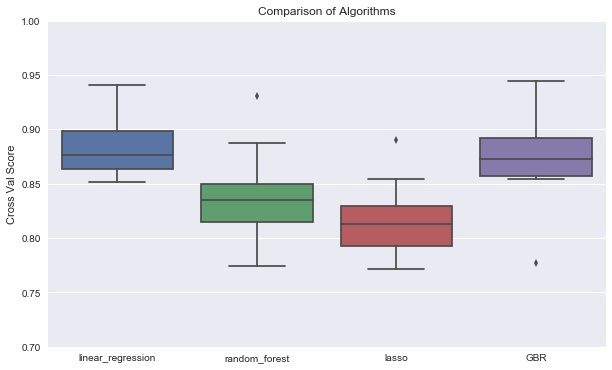

In [31]:
plt.figure(figsize=(10,6))
plt.title('Comparison of Algorithms')
sns.boxplot(plot_df)
plt.ylim(0.7, 1.0)
plt.ylabel('Cross Val Score')
plt.show()

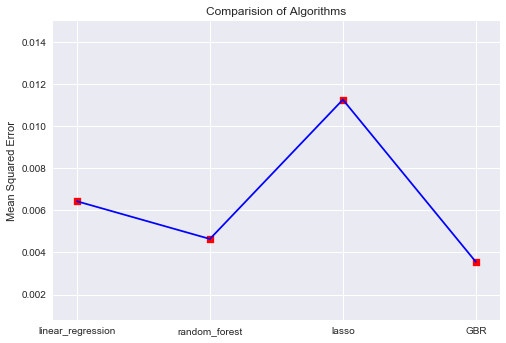

In [32]:
# Plot Mean Squared Error

plt.plot(mse_list, c='b')
plt.title('Comparision of Algorithms')
plt.ylabel('Mean Squared Error')
plt.ylim(0.0008, 0.015)
x = np.array([0,1,2,3])
plt.scatter(x, mse_list, c='r', marker="s")
plt.xticks(x, methods)
plt.show()

### Prediction with Test Data

TODO:
Now, we need to clean test data into the form our prediction model takes as input and predict the 'SalePrice' of the houses.